In [4]:
import spotipy

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpld3
from matplotlib.patches import Polygon
from mpl_toolkits.mplot3d.art3d import PolyCollection

plt.rcParams["figure.dpi"] = 140
plt.rcParams["font.size"] = 14

import DataProcessing as da

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets

import pandas as pd
import alphashape as ap
from descartes import PolygonPatch
import tqdm

import colour

In [6]:
spotify = da.authenticate()

Using `localhost` as redirect URI without a port. Specify a port (e.g. `localhost:8080`) to allow automatic retrieval of authentication code instead of having to copy and paste the URL your browser is redirected to.


Enter the URL you were redirected to:  http://localhost/?code=AQDm_lKEMgVvZubi8HgvFzRUivTv5k5WFBH_yYxolLFrulvXrUYDwGLzEuH7JkXe0bkf1EwWolXYqOvnLSLhd_gihsjjbNugP-zo5lwJcpg6RcxyDv51fc0OY9_SGsFNX-DTvnWMfRdrO0vYIPxBymFqAVJ_bPnjq1vJ7pawzoBGf_RqbHNZcapSZI3NUQ7VZt9ttPUPllymK2zNUBDrmbI3xtlQlnudE9NHTQzVasr9zLQ4nMMXLYUBf9nLVyCbgN6bceBPGs05m237KvaAbZs0euOTNK0B_e4


In [7]:
spotify.current_user()

{'display_name': 'Jack',
 'external_urls': {'spotify': 'https://open.spotify.com/user/jack5225x'},
 'followers': {'href': None, 'total': 11},
 'href': 'https://api.spotify.com/v1/users/jack5225x',
 'id': 'jack5225x',
 'images': [{'height': 300,
   'url': 'https://i.scdn.co/image/ab6775700000ee85e088a6785251933353620e01',
   'width': 300},
  {'height': 64,
   'url': 'https://i.scdn.co/image/ab67757000003b82e088a6785251933353620e01',
   'width': 64}],
 'type': 'user',
 'uri': 'spotify:user:jack5225x'}

In [9]:
data = da.fetchPublicPlaylists('Jack5225x', spotify)
data

,name,id,tracks:total,owner:display_name
0,Summer 2022,2kOkouhQxj8iAkerFQRuYb,73,Jack
1,Goes pretty hard,6wCi2uxANYtxt1yLcfTXi8,12,Jack
2,Coffee Shop,0ABpbu3ojRHU6ExsgUh53g,19,Jack
3,New Running,4uTbZI7nI2DBBG1rSeXMDk,61,Jack
4,Spring 2021,6g3mROHWIjjurXVMYYOE7h,55,Jack
5,Winter 2021,4NIN7lOL7bpxsrlNsQFwgm,68,Jack
6,Mr. Worldwide,20cHzKokFHbOFkLghApK98,63,Jack
7,Chill Playlist #72,3ZX9e2rbRmXOkEe2GHABjO,61,Jack
8,Piano Time,5dQxycubDrkwgdox2SOdRk,27,Jack
9,Winter 2020 Chill,4PZ7fIFK7s58cwGliVCZR5,42,Jack


In [5]:
phaseSpace, identities, featureNames = da.mergePlaylistTracks(data["id"], spotify)

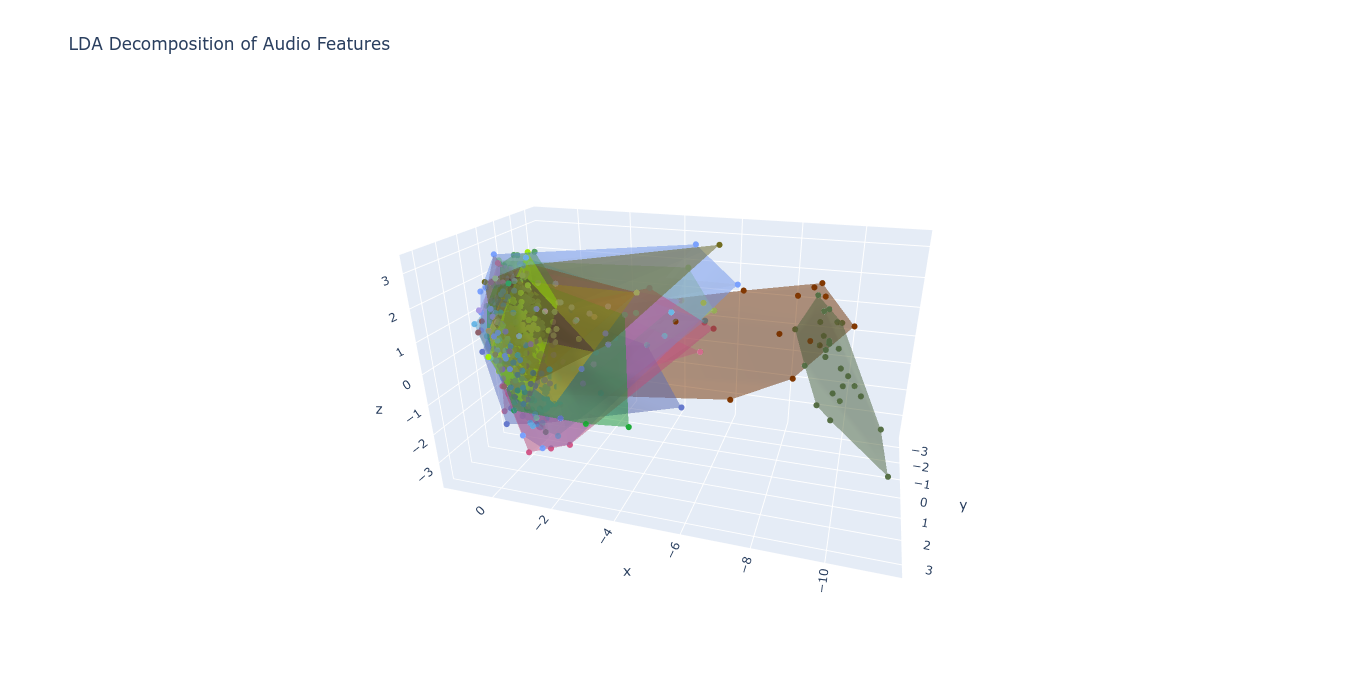

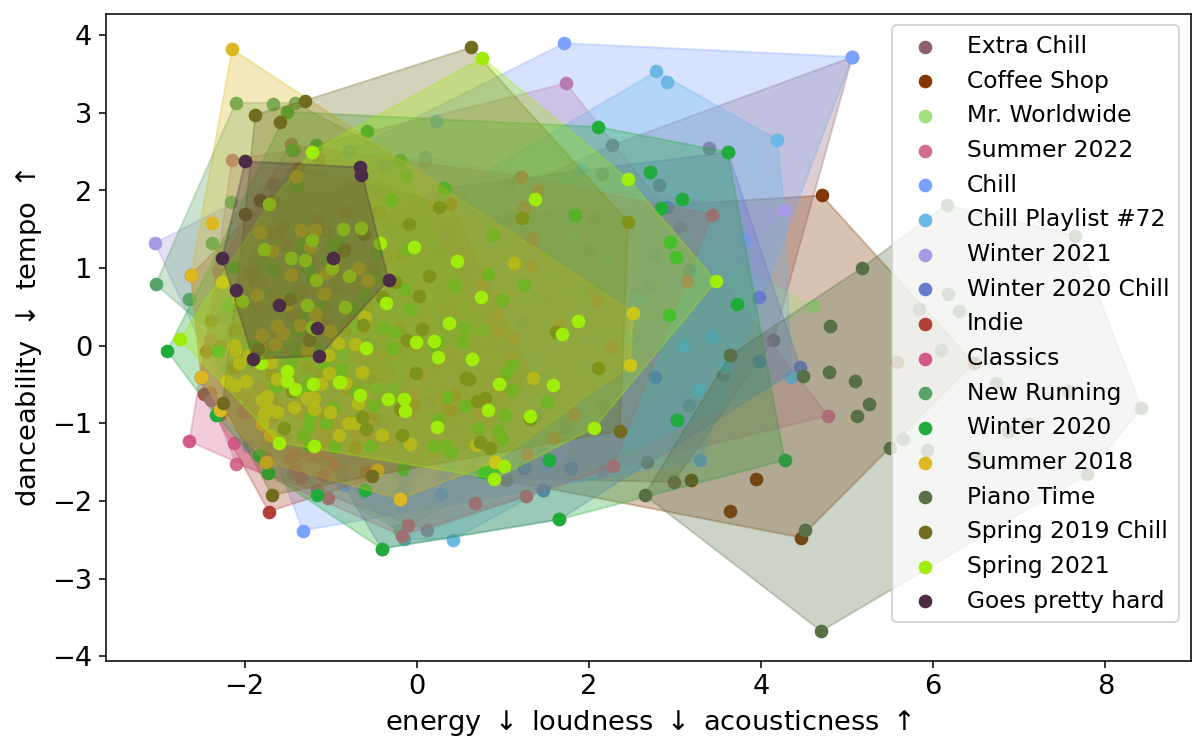

In [8]:
ldaCoords = da.computeLDA(phaseSpace, identities, 3)
pcaCoords, pcaComponents = da.computePCA(phaseSpace, 2)

interpretedLabels = da.interpretDecomposedCoordinates(pcaComponents, featureNames)

idToName = dict(zip(data["id"], data["name"]))

fig1 = da.decompositionHull(ldaCoords, identities, idToName, alpha=0.05, title='LDA Decomposition of Audio Features')
#plt.legend(fontsize=12)
#plt.show()
fig1.write_html('3d.html')
fig2 = da.decompositionHull(pcaCoords, identities, idToName, 0.05)
plt.xlabel(interpretedLabels[0])
plt.ylabel(interpretedLabels[1])
plt.legend(fontsize=12)
#with open('index.html', 'w') as f:
#    f.write(mpld3.fig_to_html(plt.gcf()))
plt.show()

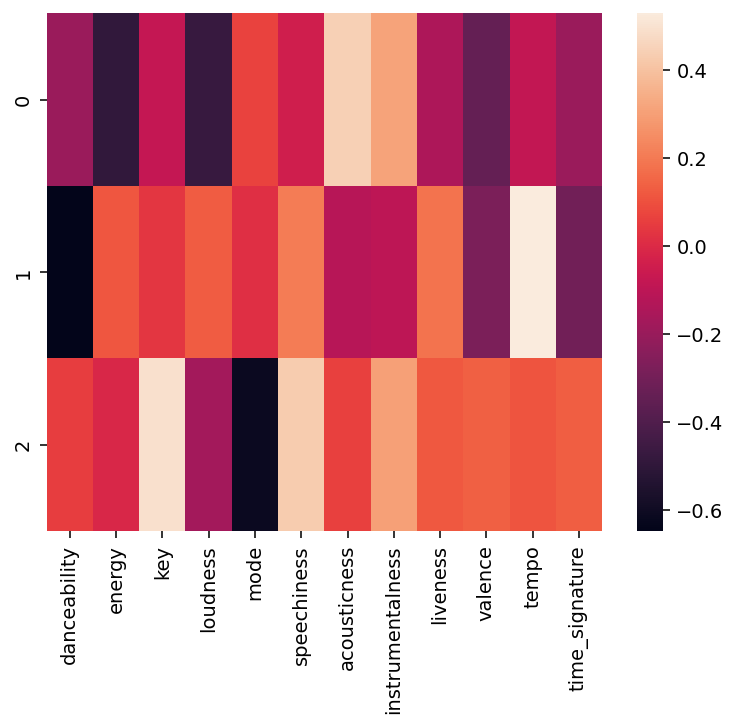

In [7]:
featureMap = pd.DataFrame(pcaComponents, columns=featureNames)
sns.heatmap(featureMap)
plt.show()

In [10]:
tracks = da.fetchPlaylistTracks(data["id"][0], spotify)
tracks

,name,artists:name,id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Kilby Girl,The Backseat Lovers,1170VohRSx6GwE6QDCHPPH,282205,0.329,0.444,1,-9.973,1,0.0417,0.057800,0.035200,0.1130,0.225,162.279,4
1,McLean's Baby Boy,Neighbor Susan,2slJjf2J4Fau7KDgD6ip5D,400000,0.708,0.543,9,-9.113,1,0.0312,0.012600,0.003590,0.1160,0.393,125.013,4
2,Waking Up,Sam Burchfield,2ty0fqitXu2U8SjlNbhZ68,239776,0.583,0.383,7,-9.821,1,0.0237,0.669000,0.000015,0.1210,0.234,82.520,4
3,Run Forever,Koethe,4xoWfVJjnbxlfU0hIiyw5e,246622,0.372,0.766,11,-7.818,0,0.0707,0.071500,0.108000,0.1070,0.190,165.984,4
4,Catalonia,Vance Joy,5zs2czX5d8B0zuQB7jiFct,218306,0.399,0.801,4,-4.638,0,0.0544,0.320000,0.000000,0.3080,0.696,199.792,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Reruns,SUGR?,1EHqPHC8yrLStpI2BYLo9t,197015,0.653,0.661,0,-7.215,1,0.0345,0.155000,0.015900,0.0982,0.536,100.041,4
69,Boyfriend,The Candescents,6uLt34RiLRDLbS6XTUUv1P,162044,0.612,0.777,1,-4.330,1,0.0545,0.000632,0.000000,0.1330,0.742,125.418,4
70,Café Deluxe,Osei The Seventh,4KAbHs539qjYyqH8OyQRPt,180362,0.927,0.308,6,-7.301,1,0.0836,0.869000,0.000000,0.0907,0.969,130.009,4
71,Watching TV With The Sound Off,Peter Thomas,7AEasC5Y9nUK9EMk4L0exP,175964,0.713,0.865,8,-5.862,1,0.0397,0.396000,0.000021,0.0581,0.722,152.039,4


100%|███████████████████████████| 10/10 [00:04<00:00,  2.29it/s]


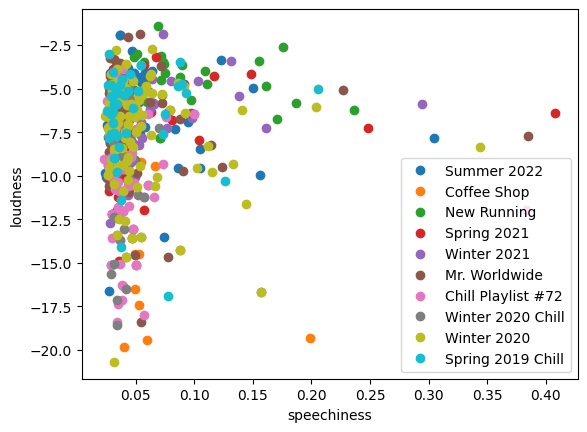

In [61]:
xAxis = 'speechiness'
yAxis = 'loudness'

#sampleIndices = [0, 1, 2, 5]
sampleIndices = np.arange(data.shape[0])[:10]

for s in tqdm.tqdm(sampleIndices):
    tracks = da.fetchPlaylistTracks(data["id"][s], spotify)
    plt.plot(tracks[xAxis], tracks[yAxis], 'o', label=data["name"][s])
    
plt.xlabel(xAxis)
plt.ylabel(yAxis)
plt.legend()
plt.show()

100%|███████████████████████████| 17/17 [00:07<00:00,  2.22it/s]


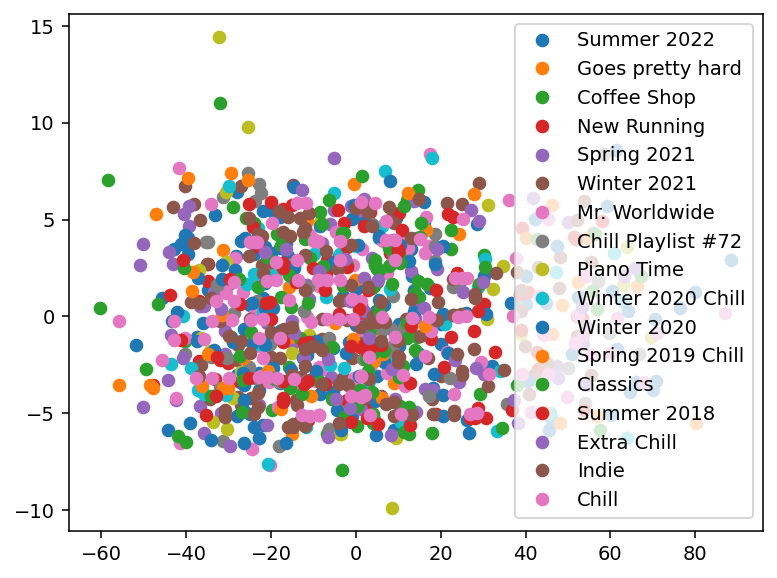

In [7]:
#sampleIndices = [0, 1, 2, 5]
sampleIndices = np.arange(data.shape[0])#[:5]

# It is easier to specify which columns will be removed
removeColumns = ['name', 'id', 'artists:name', 'duration_ms']

fullPhaseSpace = pd.DataFrame()
coordinateIdentities = []

for s in tqdm.tqdm(sampleIndices):
    phaseSpaceCoords = da.fetchPlaylistTracks(data["id"][s], spotify)

    # Generate the data that is actually relevant
    for k in removeColumns:
        del phaseSpaceCoords[k]
    
    fullPhaseSpace = fullPhaseSpace.append(phaseSpaceCoords)
    coordinateIdentities += [data["name"][s]] * phaseSpaceCoords.shape[0]
    pca = PCA(n_components=2)
    
    decomposed = pca.fit(phaseSpaceCoords).transform(phaseSpaceCoords)
    
    plt.plot(decomposed[:,0], decomposed[:,1], 'o', label=data['name'][s])
    
plt.legend()
plt.show()

In [40]:
fullPhaseSpace

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.329,0.444,1,-9.973,1,0.0417,0.057800,0.035200,0.1130,0.225,162.279,4
1,0.708,0.543,9,-9.113,1,0.0312,0.012600,0.003590,0.1160,0.393,125.013,4
2,0.583,0.383,7,-9.821,1,0.0237,0.669000,0.000015,0.1210,0.234,82.520,4
3,0.372,0.766,11,-7.818,0,0.0707,0.071500,0.108000,0.1070,0.190,165.984,4
4,0.399,0.801,4,-4.638,0,0.0544,0.320000,0.000000,0.3080,0.696,199.792,4
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.315,0.548,5,-7.728,1,0.0384,0.109000,0.000000,0.0665,0.369,205.846,4
96,0.715,0.697,2,-7.516,1,0.0576,0.282000,0.000000,0.0873,0.411,88.987,4
97,0.393,0.872,2,-2.530,1,0.0401,0.000122,0.000407,0.3120,0.394,150.087,4
98,0.619,0.671,9,-6.775,1,0.0362,0.071400,0.774000,0.1040,0.518,109.506,4


  0%|                                    | 0/10 [00:00<?, ?it/s]


ValueError: verts must be a list of (N, 3) array-like

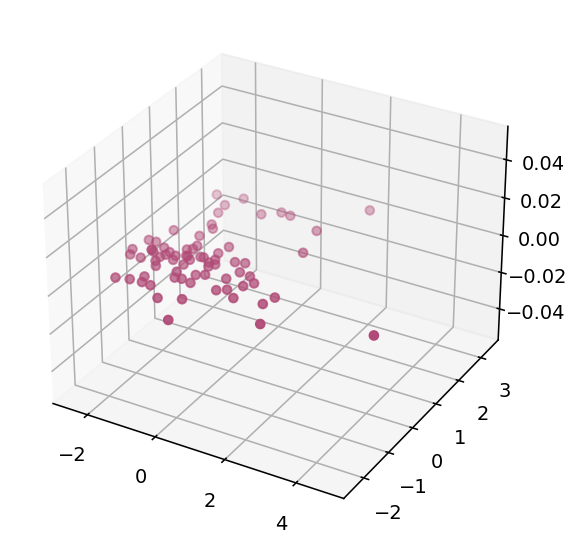

In [56]:
%matplotlib inline
pca = PCA(n_components=3)
sampleIndices = np.arange(data.shape[0])[:10]
decomposedCoords = pca.fit(phaseSpace).transform(phaseSpace)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax = fig.add_subplot()

for s in tqdm.tqdm(sampleIndices):
    indices = np.where(np.array(identities) == data["id"][s])[0]
    hull = ap.alphashape(decomposedCoords[indices], 0)
    
    color = colour.Color(pick_for=data["name"][s])

    ax.scatter(decomposedCoords[indices,0], decomposedCoords[indices,1], label=data["name"][s], c=str(color))
    #verts = np.array(list(zip(decomposedCoords[:,0], decomposedCoords[:,1], decomposedCoords[:,2])))
    ax.add_collection3d(Poly3DCollection(np.array(hull.exterior.coords), color=str(color), alpha=.2))
    
plt.legend()
plt.show()

In [45]:
np.shape(np.array(hull.exterior.coords))

(7, 3)

  0%|                                    | 0/17 [00:00<?, ?it/s]/home/jack/anaconda3/envs/ml/lib/python3.7/site-packages/descartes/patch.py:65: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.

100%|███████████████████████████| 17/17 [00:00<00:00, 89.97it/s]


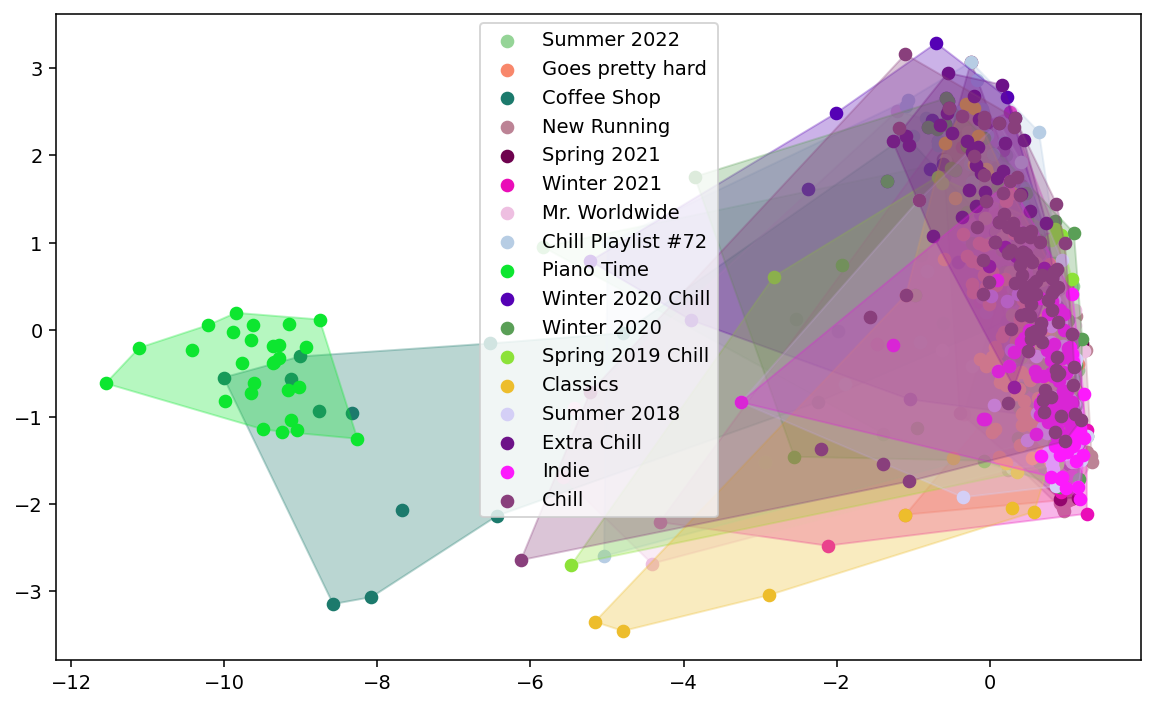

In [16]:
# Try lda
lda = LinearDiscriminantAnalysis(n_components=2)
ldaCoords = lda.fit(phaseSpace, identities).transform(phaseSpace)

fig = plt.figure(figsize=(10,6))
#ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot()

for s in tqdm.tqdm(sampleIndices):
    indices = np.where(np.array(coordinateIdentities) == data["name"][s])
    hull = ap.alphashape(ldaCoords[indices], 0.2)
    
    color = colour.Color(pick_for=data["name"][s])
    
    ax.scatter(ldaCoords[indices[0],0], ldaCoords[indices[0],1], label=data["name"][s], c=str(color))
    ax.add_patch(PolygonPatch(hull, alpha=.3, color=str(color)))
    
plt.legend()
plt.show()

In [23]:
np.argsort([1, 5, 2, 3])

array([0, 2, 3, 1])

In [ ]:
points = ldaCoords[indices]

#alpha = ap.optimizealpha(points)

hull = ap.alphashape(points, 0)

hullPoints = hull.exterior.coords.xy

In [33]:
np.shape(ldaCoords[indices[0]])

(73, 2)

In [26]:
hullPoints

(array('d', [-1.0781662525092632, -5.18444497236344, -6.1019876671749405, -1.0418639474081073, 0.9738819845955186, 1.2036151677907727, 0.9984468698804785, 0.8960997507483529, 0.3692561831905108, -1.0781662525092632]),
 array('d', [-3.124169617944624, 0.5971121679097754, 2.608429414393589, 1.8069671154525986, 1.2713503768041896, 0.9680401467895938, -1.0433304061377098, -1.4078652309420367, -2.41075361528116, -3.124169617944624]))